In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(42000, 785)

In [4]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
X = df.drop('label',axis=1)
y = df['label']
X.shape

(42000, 784)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)

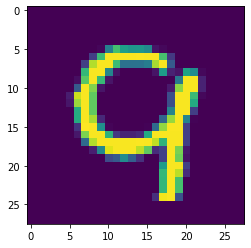

In [8]:
plt.imshow(np.array(x_train.iloc[1]).reshape(28,28))

In [9]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test =  scaler.transform(x_test)

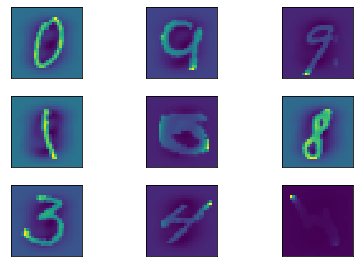

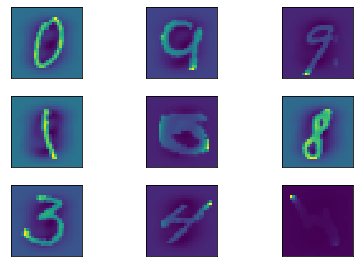

In [10]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i].reshape(28,28), interpolation='none')
  plt.xticks([])
  plt.yticks([])
fig

In [11]:
x_train[0].shape

(784,)

In [12]:
n_rows=28
n_cols=28

x_train=x_train.reshape(x_train.shape[0],n_rows,n_cols,1)

x_test=x_test.reshape(x_test.shape[0],n_rows,n_cols,1)


Input_shape=(n_rows,n_cols,1)

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential

In [14]:
num_category = 10
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

In [15]:
# creating convolution layer& relu followed by max pooling then dense neural network
cnn = Sequential(
    [
        
        #cnn
        layers.Conv2D(filters=3,kernel_size=(3,3),activation='relu',input_shape=Input_shape),
        layers.MaxPooling2D(pool_size=(2,2)),
        
        #dense
        layers.Flatten(),
        layers.Dense(64,activation='relu',name='denselayer'),
        layers.Dense(10,activation='sigmoid', name='outputlayer')
    ]
)

In [16]:
# compling the model 
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history = cnn.fit(x_train,y_train, epochs=10)

Epoch 1/10
919/919 [==============================] - 7s 6ms/step - loss: 0.4091 - accuracy: 0.8841
Epoch 2/10
919/919 [==============================] - 5s 6ms/step - loss: 0.1931 - accuracy: 0.9427
Epoch 3/10
919/919 [==============================] - 4s 5ms/step - loss: 0.1373 - accuracy: 0.9591
Epoch 4/10
919/919 [==============================] - 4s 4ms/step - loss: 0.1041 - accuracy: 0.9687
Epoch 5/10
919/919 [==============================] - 4s 5ms/step - loss: 0.0868 - accuracy: 0.9739
Epoch 6/10
919/919 [==============================] - 4s 4ms/step - loss: 0.0696 - accuracy: 0.9789
Epoch 7/10
919/919 [==============================] - 4s 4ms/step - loss: 0.0555 - accuracy: 0.9827
Epoch 8/10
919/919 [==============================] - 4s 4ms/step - loss: 0.0485 - accuracy: 0.9850
Epoch 9/10
919/919 [==============================] - 4s 4ms/step - loss: 0.0445 - accuracy: 0.9869
Epoch 10/10
919/919 [==============================] - 4s 4ms/step - loss: 0.0321 - accuracy: 0.9893

In [18]:
# evaluate model accuracy
cnn.evaluate(x_test,y_test)

394/394 [==============================] - 2s 4ms/step - loss: 0.2414 - accuracy: 0.9712


[0.24136576056480408, 0.9711927771568298]

In [19]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 3)         30        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 3)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 507)               0         
                                                                 
 denselayer (Dense)          (None, 64)                32512     
                                                                 
 outputlayer (Dense)         (None, 10)                650       
                                                                 
Total params: 33,192
Trainable params: 33,192
Non-trainable params: 0
____________________________________________________

In [20]:
y_pred = cnn.predict(x_test)

394/394 [==============================] - 1s 3ms/step


In [21]:
y_test = y_test.argmax(axis=-1)
np.shape(y_test)

(12601,)

In [22]:
y_pred = y_pred.argmax(axis=-1)
np.shape(y_pred)

(12601,)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9698436632013332